## Project 3 : Soccer and Basketball texts analysis

## Problem Statement

Major League Soccer (MLS) is working on a project to expand their competitive team count from 26 teams to 30 teams by 2023. The purpose of the project is to increase their viewership in the US as well as attract international soccer stars to join MLS teams. As of now, MLS wants to run an online marketing campaign through social media platforms and billboards in hope of making their expansion project known. To improve engagement with fans, MLS asked fans to send in their suggestions for the slogan. This marketing campaign requires a slogan that is clear, precise and not to be confused with other major sporting events in the US. However, due to the popularity of National Basketball Association (NBA), most suggested slogans are likely to be associated with basketball.

This slogan will be all over social media, participating team's stadiums and merchandise thus it is crucial that the slogan is related to soccer instead of the basketball. The goal of the project is to develop a classification model that can evaluate suggested slogans and tell whether the slogan is more associated to soccer or basketball.

## Executive Summary

The Beautiful Game is a nickname for football or soccer, popular within media and advertising, it was made popular by a South American who is a legend of the sport. From 1996, Major League Soccer (MLS) is the league that plays soccer at the highest level in US and Canada. Providing entertainment by playing the beautiful game, MLS has expansion plans to increase its competing team capacity from 26 to 30 by 2023. Although the beautiful game is ranked as the most popular sport worldwide, it is only the 4th ranked sport in terms of popularity in the US.

To maintain their competitive standards and with the aim of increasing viewership, MLS will be expanding the number of competitive teams from 26 to 30 teams by 2023. With that in the pipeline, MLS is focusing on marketing themselves to let fans and players know what the future holds for the league. MLS needs a slogan for this expansion project that will be the talk of the town among soccer fans. This slogan will be printed on participating team's stadiums and merchandise as well as on social media as part of marketing efforts. However, due to the popularity of the NBA in the US, suggested slogans seem to be associated to basketball.

My team and I have developed a model that is able to provide the solution to the problem. This model is able to tell whether a sentence is more associated to soccer or basketball and you could use this model to test on any suggested slogans. This can potentially solve the issue of deciding on a slogan that is thought to be associated to soccer but instead, more associated to basketball. The model is not just limited to testing suggested slogans but you can also test taglines, phrases that you might want to use for future marketing etc.

After cleaning and analysing top posts and comments by netizens in both soccer and basketball subreddits, we used the sentences collected to train various classification model. Our model selection is base on the specificity and accuracy. In essence, we want to make sure our model does not predict a sentence/text to be soccer when it is actually associated to basketball (where soccer is 1 and basketball is 0), we select the model that gives us a specificity (True Negative Rate) of as close to 1 as possible. As we have a rather balanced data set for both basketball and soccer, we used accuracy to evaluate our models. We select the model that gives us a higher accuracy in making predictions to make sure the model is accurate overall in its predictions.

We used both Count and Tfidf Vectorizers to process the text and fitted the text into Multinomial Naive Bayes Model, K Nearest Neighbors Model, Support Vector Machine Model as well as Logistic Regression Model. We then proceed to tune the hyperparameters of the vectorizers to achieve the optimal results. As mentioned, what we want is to have a high specificity and high accuracy, where we want to minimize the possibility of predicting a text/sentence as associated to soccer(predict) when it is actually associated to basketball(actual). After evaluating our results, we selected the Multinomial Naive Bayes Model with Tfidf Vectorizer as our production and implementation model as it gives us a the most optimal specificity and is highly accurate.

We believe the model we developed is capable of solving the issue of evaluating whether a suggested slogan is associated to basketball or soccer. By adopting our model, MLS will be able to filter out all the suggested slogans that are associated to basketball and show only soccer slogans. From there, it narrows down the options and saves time in your consideration. Besides the slogan, this model is not subjected to a one time usage. You can implement it for any future testing of sentences and texts in your marketing materials or campaigns.

## Content
- [Reddit API Scrapping](#Reddit-API-Scrapping)
- [Scrapped data from Basketball and Soccer subreddits](#Scrapped-data-from-Basketball-and-Soccer-subreddits)

## Reddit API Scrapping

In [1]:
# Importing Libraries
import requests
import pandas as pd 
import time
import random

**Basketball Subreddit**

In [2]:
bball_url = 'https://www.reddit.com/r/basketball.json' # URL for basketball subreddit

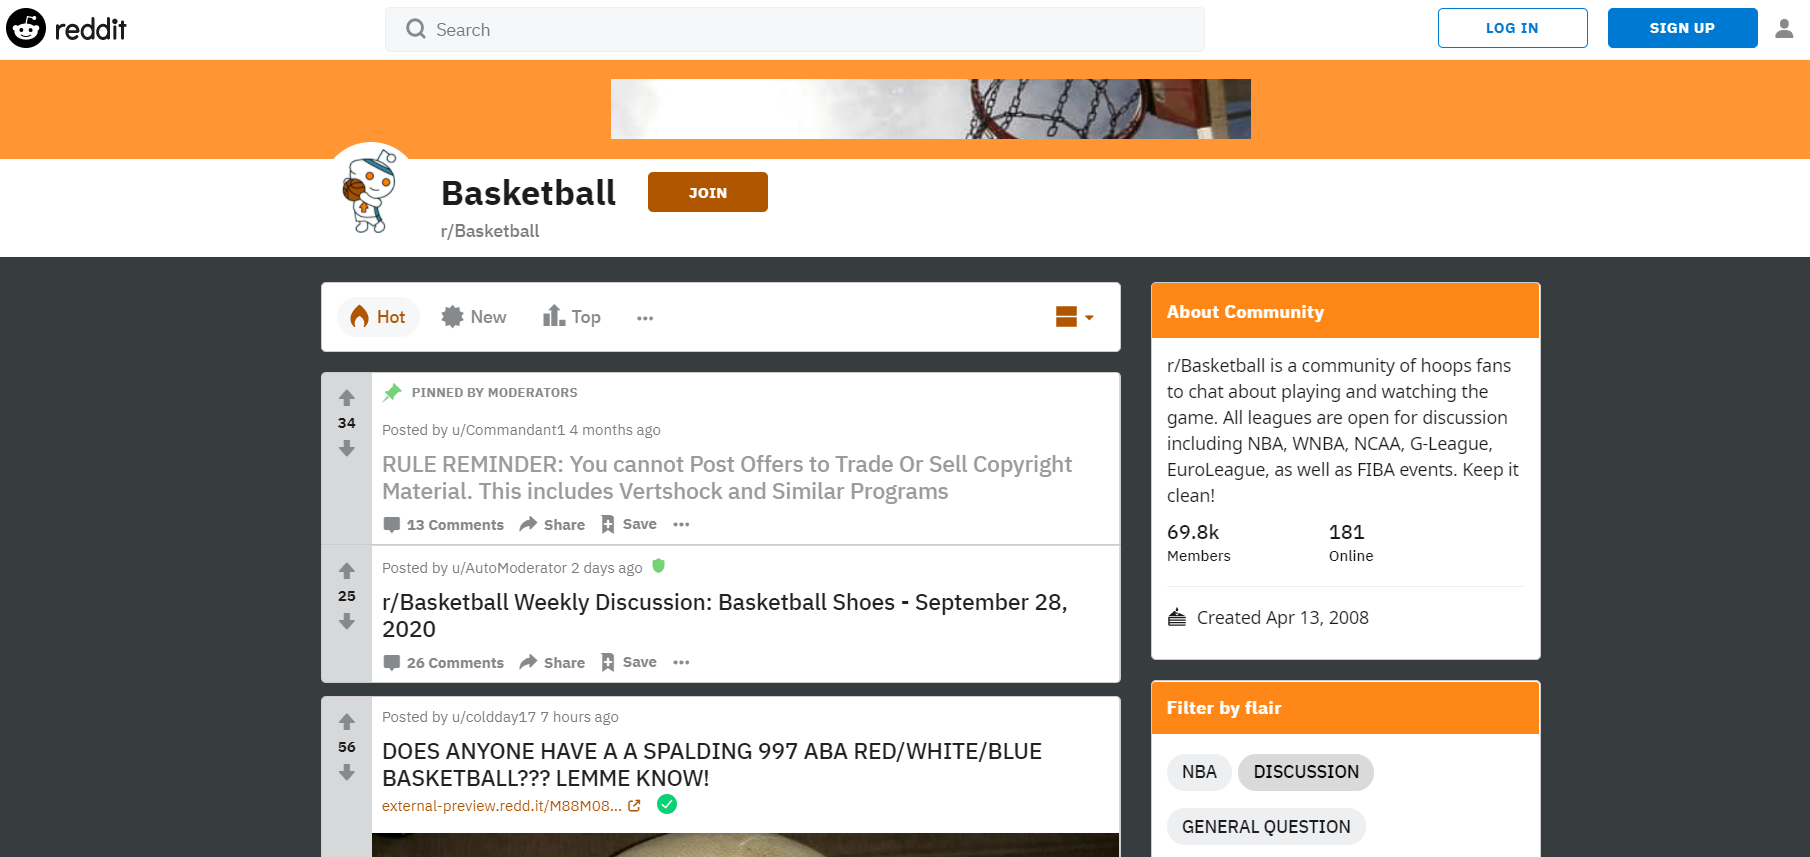

In [3]:
bball_posts = []
bball_after = None

print('Scrapping basketball subreddit...')

for i in range(45):                    # Looping through 45 times to get enough pages of posts for subreddit
    if bball_after == None:
        bball_url_new = bball_url

    else:
        bball_url_new = bball_url + '?after=' + bball_after # URL to scrape
    
    bball_res = requests.get(bball_url_new, headers={'User-agent': 'NBA project 1.0'})
    
    if bball_res.status_code != 200:
        print('Status error', bball_res.status_code)
        break
    
    bball_dict = bball_res.json()
    bball_posts_current = []
    
    for bpost in bball_dict['data']['children']:   # Looping through each post in the page
        bcomment_url = 'https://www.reddit.com' + bpost['data']['permalink'] + '.json'
        bball_comment = requests.get(bcomment_url, headers={'User-agent': 'NBA usage 1.0'})
        bball_comment_dict = bball_comment.json()        
        bball_posts_current.append(bpost['data'])
        
        # Getting list of dictionaries from the URL to list
        for bbody in bball_comment_dict[1]['data']['children']: # retrieving comments for each post
            bball_posts_current.append({'comments': bbody['data'].get('body',None)})
            
        time.sleep(0.01)
        
    bball_after = bball_dict['data']['after'] # Getting the last user for the URL
    bball_posts.extend(bball_posts_current)  # retreiving list of dictionaries
    
    bball_df = pd.DataFrame(bball_posts)
    bball_df.to_csv('../datasets/bball_df.csv', index = False) # Saving post scrapped into csv
    print(f"{i+1} of 45 rounds: status code {bball_res.status_code}, data has {len(bball_df)} rows, last name: {bball_after}")
    # Number of unique selftext
    
    time.sleep(0.1)

Scrapping basketball subreddit...
1 of 45 rounds: status code 200, data has 137 rows, last name: t3_j15hor
2 of 45 rounds: status code 200, data has 205 rows, last name: t3_izy6mo
3 of 45 rounds: status code 200, data has 290 rows, last name: t3_iys7ml
4 of 45 rounds: status code 200, data has 384 rows, last name: t3_ixazbb
5 of 45 rounds: status code 200, data has 477 rows, last name: t3_iw9ykx
6 of 45 rounds: status code 200, data has 585 rows, last name: t3_iubock
7 of 45 rounds: status code 200, data has 662 rows, last name: t3_it593u
8 of 45 rounds: status code 200, data has 714 rows, last name: t3_iryxnn
9 of 45 rounds: status code 200, data has 775 rows, last name: t3_iq0n28
10 of 45 rounds: status code 200, data has 855 rows, last name: t3_ioz99x
11 of 45 rounds: status code 200, data has 975 rows, last name: t3_inubjy
12 of 45 rounds: status code 200, data has 1074 rows, last name: t3_imhiua
13 of 45 rounds: status code 200, data has 1202 rows, last name: t3_ilaghu
14 of 45 ro

**Soccer Subreddit**

In [4]:
fball_url = 'https://www.reddit.com/r/soccer.json' # URL for soccer subreddit

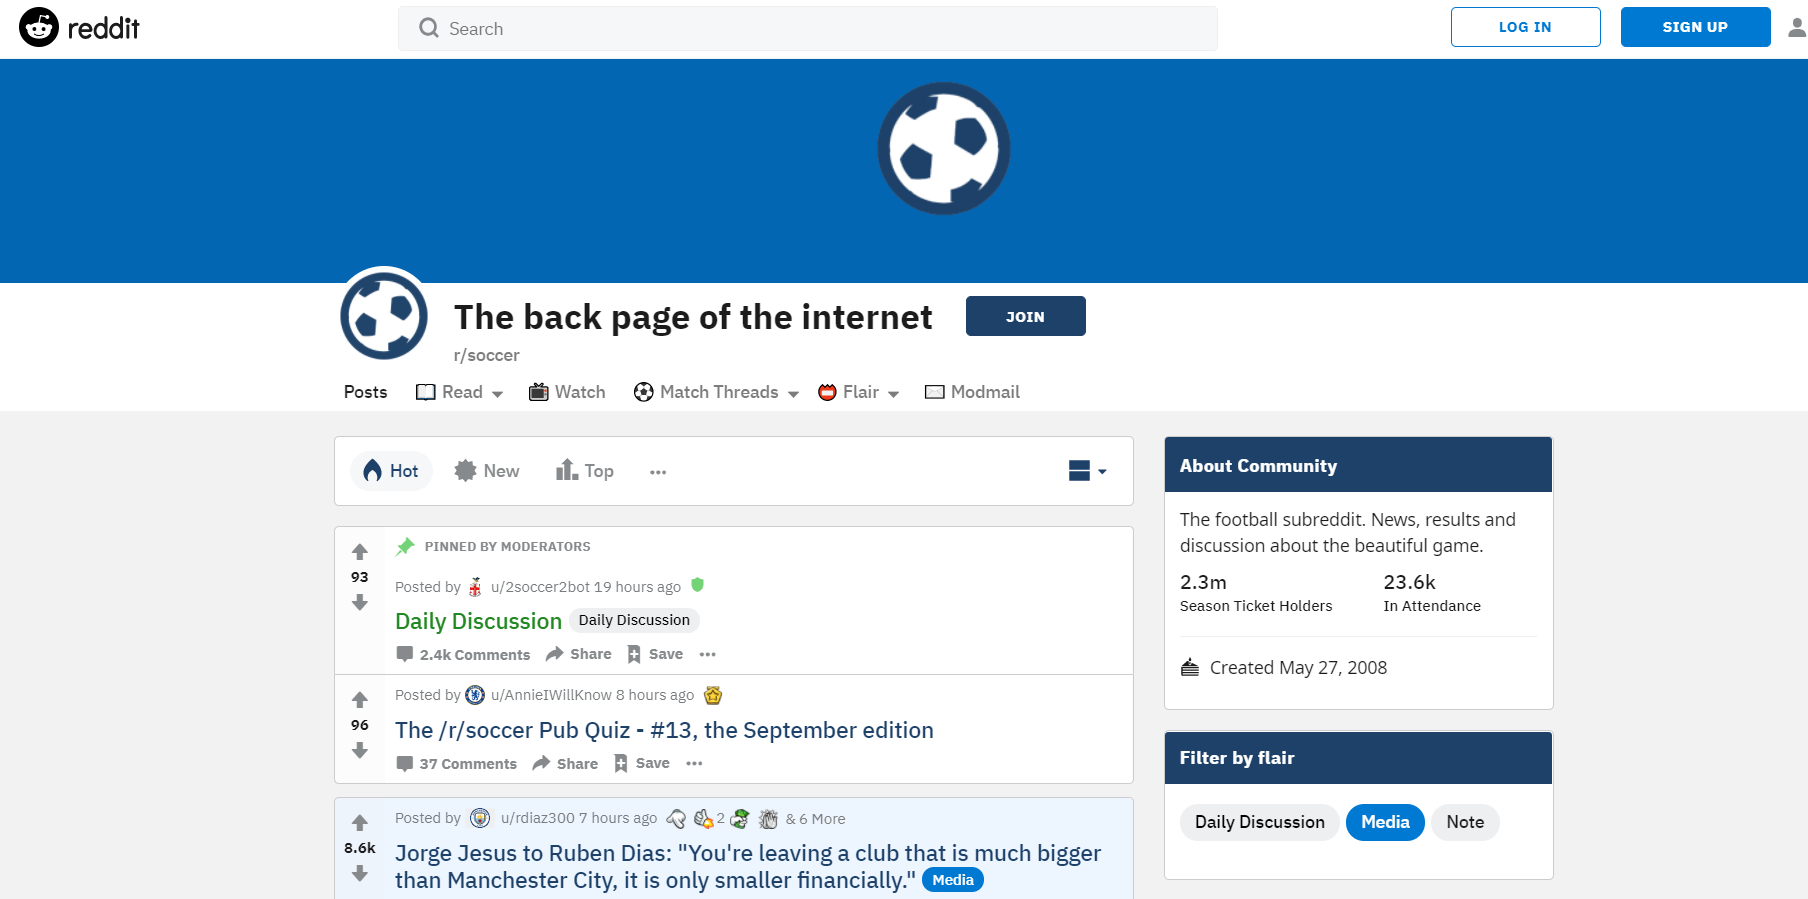

In [5]:
fball_posts = []
fball_after = None

print('Scrapping soccer subreddit...')

for i in range(45):                    # Looping through 45 times to get enough pages of posts for subreddit
    if fball_after == None:
        fball_url_new = fball_url

    else:
        fball_url_new = fball_url + '?after=' + fball_after # URL to scrape
    
    fball_res = requests.get(fball_url_new, headers={'User-agent': 'MLS project 1.0'})
    
    if fball_res.status_code != 200:
        print('Status error', fball_res.status_code)
        break
    
    fball_dict = fball_res.json()
    fball_posts_current = []
    
    for fpost in fball_dict['data']['children']:   # Looping through each post in the page
        fcomment_url = 'https://www.reddit.com' + fpost['data']['permalink'] + '.json'
        fball_comment = requests.get(fcomment_url, headers={'User-agent': 'MLS usage 1.0'})
        fball_comment_dict = fball_comment.json()
        fball_posts_current.append(fpost['data'])
        
        # Getting list of dictionaries from the URL to list
        for fbody in fball_comment_dict[1]['data']['children'][0:6]: # retrieving 6 comments for each post
            fball_posts_current.append({'comments': fbody['data'].get('body',None)})
         
        time.sleep(0.01)
    
    fball_after = fball_dict['data']['after'] # Getting the last user for the URL
    fball_posts.extend(fball_posts_current)  # retreiving list of dictionaries
    
    fball_df = pd.DataFrame(fball_posts)
    fball_df.to_csv('../datasets/fball_df.csv', index = False) # Saving post scrapped into csv
    print(f"{i+1} of 45 rounds: status code {fball_res.status_code}, data has {len(fball_df)} rows, last name: {fball_after}")
    # Number of unique selftext
    
    time.sleep(0.1)

Scrapping soccer subreddit...
1 of 45 rounds: status code 200, data has 189 rows, last name: t3_j3axhf
2 of 45 rounds: status code 200, data has 363 rows, last name: t3_j384oz
3 of 45 rounds: status code 200, data has 524 rows, last name: t3_j39psn
4 of 45 rounds: status code 200, data has 688 rows, last name: t3_j37504
5 of 45 rounds: status code 200, data has 836 rows, last name: t3_j36wpo
6 of 45 rounds: status code 200, data has 984 rows, last name: t3_j2v2ci
7 of 45 rounds: status code 200, data has 1145 rows, last name: t3_j2mt85
8 of 45 rounds: status code 200, data has 1277 rows, last name: t3_j2lpci
9 of 45 rounds: status code 200, data has 1437 rows, last name: t3_j2s7yu
10 of 45 rounds: status code 200, data has 1595 rows, last name: t3_j2j2wk
11 of 45 rounds: status code 200, data has 1746 rows, last name: t3_j2w4ij
12 of 45 rounds: status code 200, data has 1879 rows, last name: t3_j2jwux
13 of 45 rounds: status code 200, data has 2021 rows, last name: t3_j2rw4p
14 of 45 r

Scrapped all comments from basketball as there are not much comments within each post. Scrapped first 6 comments within soccer as there are plenty of comments for each post.

## Scrapped data from Basketball and Soccer subreddits

In [6]:
bball_df.head() # Most rows have NaN as they are the comments of the post

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,media,is_video,comments,post_hint,url_overridden_by_dest,preview,link_flair_template_id,poll_data,crosspost_parent_list,crosspost_parent
0,NaN,Basketball,Admins have banned other subs for this.\n\nNo ...,t2_aj47j,False,NaN,0.0,False,RULE REMINDER: You cannot Post Offers to Trade...,[],...,None,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,What are your recommendations on increasing yo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Got it,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Got it,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,how about just giving someone a free jump prog...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
fball_df.head() # Most rows have NaN as they are the comments of the post

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,created_utc,num_crossposts,media,is_video,comments,url_overridden_by_dest,crosspost_parent_list,crosspost_parent,media_metadata,author_cakeday
0,NaN,soccer,This thread is for general football discussion...,t2_2glav0rp,False,NaN,0.0,False,Daily Discussion,"[{'e': 'text', 't': 'Daily Discussion'}]",...,1.601497e+09,0.0,None,False,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Marega will tear Laporte a new one,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,RIP Porto.,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,So Ruben Dias moved to England only to keep ge...,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"So why couldn't United get group C or H, when ...",NaN,NaN,NaN,NaN,NaN


In [8]:
bball_df.to_csv('../datasets/bball_df.csv', index = False)
fball_df.to_csv('../datasets/fball_df.csv', index = False)

# Saving updated dataframe into csv

**Source**
- Sports in USA : https://en.wikipedia.org/wiki/Sports_in_the_United_States#Overview
- Sports worldwide : https://www.sportsvenue-technology.com/articles/top-10-sports-in-the-world